In [33]:
INPUT_SHAPE = (1400, 2100)
p_input = '/Users/yang.zhang/git/cld/input'

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('../input/train.csv')
df.shape

(22184, 2)

In [27]:
df.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [62]:
rle = df.EncodedPixels[df.EncodedPixels.notnull()].sample().values[0]

In [63]:
def rle2msk(rle, shape=INPUT_SHAPE):
    '''
    rle: run-length as string formatted (start length)
    shape: (height, width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F')  # Needed to align to RLE direction

In [64]:
msk = rle2msk(rle)
msk

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

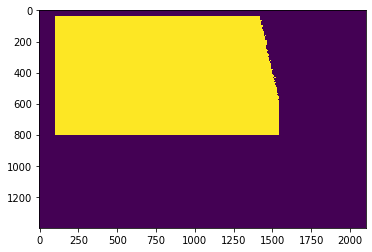

In [65]:
plt.imshow(msk);

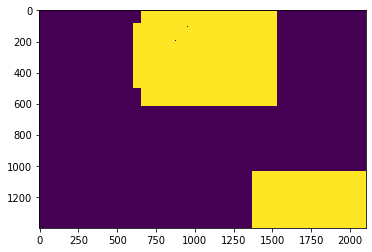

In [211]:
rle = df.EncodedPixels[df.EncodedPixels.notnull()].sample().values[0]
msk = rle2msk(rle)
plt.imshow(msk)
plt.show()

In [221]:
import sys
sys.getrecursionlimit()

3000

In [222]:
sys.setrecursionlimit(30000)

In [223]:
# https://www.geeksforgeeks.org/find-number-of-islands/
# Program to count islands in boolean 2D matrix 
class Graph: 
  
    def __init__(self, g): 
        self.ROW, self.COL= g.shape 
        self.graph = g 
  
    # A function to check if a given cell  
    # (row, col) can be included in DFS 
    def isSafe(self, i, j, visited): 
        # row number is in range, column number 
        # is in range and value is 1  
        # and not yet visited 
        return (i >= 0 and i < self.ROW and 
                j >= 0 and j < self.COL and 
                not visited[i][j] and self.graph[i][j]) 
              
  
    # A utility function to do DFS for a 2D  
    # boolean matrix. It only considers 
    # the 8 neighbours as adjacent vertices 
    def DFS(self, i, j, visited): 
  
        # These arrays are used to get row and  
        # column numbers of 8 neighbours  
        # of a given cell 
        rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
        colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 
          
        # Mark this cell as visited 
        visited[i][j] = True
  
        # Recur for all connected neighbours 
        for k in range(8): 
            if self.isSafe(i + rowNbr[k], j + colNbr[k], visited): 
                self.DFS(i + rowNbr[k], j + colNbr[k], visited) 
  
  
    # The main function that returns 
    # count of islands in a given boolean 
    # 2D matrix 
    def countIslands(self): 
        # Make a bool array to mark visited cells. 
        # Initially all cells are unvisited 
        visited = [[False for j in range(self.COL)]for i in range(self.ROW)] 
  
        # Initialize count as 0 and travese  
        # through the all cells of 
        # given matrix 
        count = 0
        for i in range(self.ROW): 
            for j in range(self.COL): 
                # If a cell with value 1 is not visited yet,  
                # then new island found 
                if visited[i][j] == False and self.graph[i][j] == 1: 
                    # Visit all cells in this island  
                    # and increment island count 
                    self.DFS(i, j, visited) 
                    count += 1
  
        return count 

In [224]:
g = Graph(msk) 

In [225]:
g.countIslands()

RecursionError: maximum recursion depth exceeded in comparison